Some of the imports are not useful yet

In [1]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from six.moves import range
import tensorflow as tf
from yaafelib import *

In [14]:
with open('data/gztan.pickle', 'rb') as f:
    save = pickle.load(f)
    train_dataset_xs = save['train_dataset_xs']
    train_dataset_y = save['train_dataset_y']
    test_dataset_xs = save['test_dataset_xs']
    test_dataset_y = save['test_dataset_y']
    del save  # gc

def oneHotEncoder(pos, max):
    encoded = []
    for i in range(0, max):
        if i == pos:
            encoded.append(1)
        else:
            encoded.append(0)
    return encoded
def reformat(dataset, labels):
    dataset = np.asarray(dataset).astype(np.float32)
    labels = map(lambda x: np.int32(x), labels)
    labels = map(lambda x: oneHotEncoder(x, 10), labels)
    return dataset, labels

train_dataset, train_labels = reformat(train_dataset_xs, train_dataset_y)
test_dataset, test_labels = reformat(test_dataset_xs, test_dataset_y)
print(train_dataset.shape)
print (train_dataset_y)

(500, 146)
[1 5 2 3 4 7 7 8 8 5 9 8 4 3 2 8 9 3 4 1 5 0 2 3 7 9 9 8 9 0 3 9 0 1 1 7 2
 1 3 2 8 5 0 6 1 4 7 7 4 4 0 5 7 2 2 3 5 6 5 7 6 5 6 4 4 8 8 9 1 8 9 7 3 8
 7 9 8 0 6 2 4 0 6 6 6 3 8 8 6 0 2 3 6 2 1 7 2 5 7 3 0 7 9 5 0 9 4 4 8 7 7
 9 4 4 5 1 4 6 7 2 4 9 3 9 9 3 1 4 6 0 2 3 4 8 5 4 5 1 5 3 5 9 3 9 1 6 7 0
 3 2 4 4 9 5 5 0 0 0 8 7 6 3 2 9 3 2 4 2 5 8 7 4 3 8 2 8 1 2 2 3 9 9 2 5 1
 6 7 9 7 8 1 2 9 1 0 2 5 4 6 9 8 1 6 7 7 8 3 4 5 4 1 7 6 8 7 4 0 6 9 6 8 3
 1 5 4 7 4 8 9 1 9 5 5 9 3 1 9 8 4 5 0 9 1 9 5 3 3 1 8 5 7 4 6 4 1 3 1 0 6
 4 5 6 7 8 6 2 1 9 6 5 2 4 5 2 7 9 2 5 0 6 3 0 0 6 9 6 7 2 9 9 2 3 8 2 2 3
 1 2 0 4 6 4 1 3 7 5 0 8 2 0 2 6 3 2 8 6 8 7 5 3 7 7 3 6 6 0 0 6 3 5 8 0 1
 1 3 9 2 8 5 8 5 8 6 2 5 3 7 3 8 4 0 9 7 6 7 7 5 3 2 6 4 0 8 7 9 6 8 0 7 3
 7 4 2 1 7 2 3 1 0 6 1 4 0 0 8 7 3 0 5 9 3 4 5 8 3 5 7 3 2 1 1 7 5 4 9 1 0
 2 6 8 1 6 1 0 5 8 0 2 2 7 0 8 0 8 9 2 4 5 3 4 9 5 6 1 8 1 2 4 9 4 8 3 6 6
 9 0 0 5 6 0 3 4 5 9 7 0 3 6 5 5 2 1 0 0 2 4 6 6 7 8 0 9 1 9 1 6 3 1 0 7 4
 9 0 5 1 1 2 1

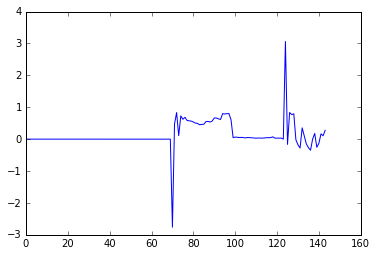

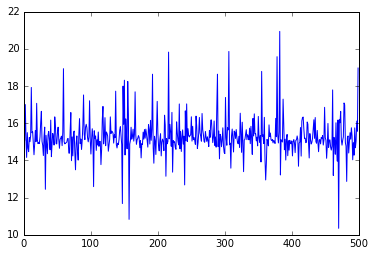

[  1.57757831   0.23347399  -0.02088717  -0.09972306  -0.07078309
   0.01746299   0.18735385   0.20693411  -0.02356873  -0.08024924
  -0.0153228    0.57719725   1.85612345   0.53925461   3.74079895
   1.6848923    0.86613327   0.23579586   2.60188961   2.41730785
   2.60456347   0.09442881   2.25674319   6.43778896   1.145625
  -0.09653429  -0.1643424   -0.25997469  -0.29978833  -0.21803612
  -0.19641036  -0.13531552  -0.08064315   0.           0.           0.
   0.83394444  -0.21017092  -0.29116786  -0.33122566  -0.30858302
  -0.21654321  -0.13942221  -0.23606735  -0.13457452  -0.12546811
  -0.06419861   0.87460071   0.12179591   0.36335477   0.92156476
   0.15843914   0.05469317   1.35918188   4.77835703   7.64165688
  -0.21358387   6.15432215  11.65023613   1.6957655   -0.18532304
  -0.2046864   -0.0986755   -0.08810695  -0.0687784   -0.06480666
  -0.06046719  -0.06210662   0.           0.           0.           0.33585984
   0.29281369  -0.33667031   0.32139069  -0.72348863  -0.795

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


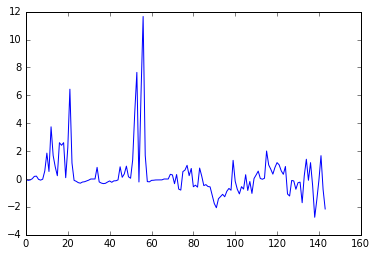

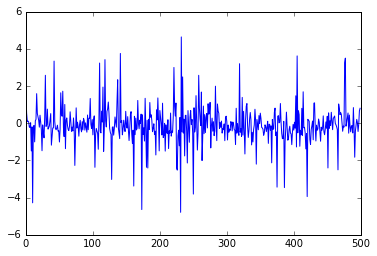

In [9]:
%matplotlib inline  

plt.plot(train_dataset[0,2:])
plt.show()

plt.plot(train_dataset[:,0])
plt.show()

mu = train_dataset.mean(axis=0)
sigma = train_dataset.std(axis=0)
train_dataset_scaled = (train_dataset - mu) / sigma
test_dataset_scaled = (test_dataset - mu) / sigma

train_dataset_scaled = np.nan_to_num(train_dataset_scaled)
train_dataset_scaled = np.nan_to_num(test_dataset_scaled)

print(train_dataset_scaled[0])


plt.plot(train_dataset_scaled[0,2:])
plt.show()

plt.plot(train_dataset_scaled[:,0])
plt.show()

In [15]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

batch_size = 128
num_labels = 10
num_features = 146
hidden_layer1_size = 1024
hidden_layer2_size = 256
hidden_lastlayer_size = 56

regularization_meta = 0.03

graph = tf.Graph()
with graph.as_default():
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_dataset = tf.constant(test_dataset_scaled)
    keep_prob = tf.placeholder(tf.float32)

    weights_layer1 = tf.Variable(tf.truncated_normal([num_features, hidden_layer1_size], stddev=0.05))
    biases_layer1 = tf.Variable(tf.zeros([hidden_layer1_size]))

    weights_layer2 = tf.Variable(
        tf.truncated_normal([hidden_layer1_size, hidden_layer1_size], stddev=0.05))
    biases_layer2 = tf.Variable(tf.zeros([hidden_layer1_size]))

    weights_layer3 = tf.Variable(
        tf.truncated_normal([hidden_layer1_size, hidden_layer2_size], stddev=0.05))
    biases_layer3 = tf.Variable(tf.zeros([hidden_layer2_size]))

    weights_layer4 = tf.Variable(
        tf.truncated_normal([hidden_layer2_size, hidden_lastlayer_size], stddev=0.05))
    biases_layer4 = tf.Variable(tf.zeros([hidden_lastlayer_size]))

    weights = tf.Variable(tf.truncated_normal([hidden_lastlayer_size, num_labels], stddev=0.1))
    biases = tf.Variable(tf.zeros([num_labels]))

    def getNN4Layer(dSet, use_dropout):
        input_to_layer1 = tf.matmul(dSet, weights_layer1) + biases_layer1
        hidden_layer1_output = tf.nn.relu(input_to_layer1)

        logits_hidden1 = None
        if use_dropout:
            dropout_hidden1 = tf.nn.dropout(hidden_layer1_output, keep_prob)
            logits_hidden1 = tf.matmul(dropout_hidden1, weights_layer2) + biases_layer2
        else:
            logits_hidden1 = tf.matmul(hidden_layer1_output, weights_layer2) + biases_layer2

        hidden_layer2_output = tf.nn.relu(logits_hidden1)

        logits_hidden2 = None
        if use_dropout:
            dropout_hidden2 = tf.nn.dropout(hidden_layer2_output, keep_prob)
            logits_hidden2 = tf.matmul(dropout_hidden2, weights_layer3) + biases_layer3
        else:
            logits_hidden2 = tf.matmul(hidden_layer2_output, weights_layer3) + biases_layer3

        hidden_layer3_output = tf.nn.relu(logits_hidden2)
        logits_hidden3 = None
        if use_dropout:
            dropout_hidden3 = tf.nn.dropout(hidden_layer3_output, keep_prob)
            logits_hidden3 = tf.matmul(dropout_hidden3, weights_layer4) + biases_layer4
        else:
            logits_hidden3 = tf.matmul(hidden_layer3_output, weights_layer4) + biases_layer4

        hidden_layer4_output = tf.nn.relu(logits_hidden3)
        logits = None
        if use_dropout:
            dropout_hidden4 = tf.nn.dropout(hidden_layer4_output, keep_prob)
            logits = tf.matmul(dropout_hidden4, weights) + biases
        else:
            logits = tf.matmul(hidden_layer4_output, weights) + biases

        return logits

    logits = getNN4Layer(tf_train_dataset, True)
    logits_test = getNN4Layer(tf_test_dataset, False)

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    global_step = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(0.3, global_step, 500, 0.90, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

    train_prediction = tf.nn.softmax(logits)
    test_prediction = tf.nn.softmax(logits_test)

    num_steps = 1001
    
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print("Initialized")
        for step in xrange(num_steps):
            offset = (step * batch_size) % (len(train_labels) - batch_size)
            batch_data = train_dataset_scaled[offset:(offset + batch_size)]
            batch_labels = train_labels[offset:(offset + batch_size)]

            feed_dict = {tf_train_dataset: batch_data, tf_train_labels: batch_labels, keep_prob: 0.7}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 100 == 0):
                print("Minibatch loss at step", step, ":", l)
                print("Minibatch accuracy: %.1f%%" % accuracy(train_prediction.eval(
                    feed_dict={tf_train_dataset: batch_data, tf_train_labels: batch_labels, keep_prob: 1.0}),
                                                              batch_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(feed_dict={keep_prob: 1.0}), test_labels))

Initialized
Minibatch loss at step 0 : 2.31281
Minibatch accuracy: 13.3%
Minibatch loss at step 100 : 1.49582
Minibatch accuracy: 71.9%
Minibatch loss at step 200 : 0.301796
Minibatch accuracy: 98.4%
Minibatch loss at step 300 : 0.094177
Minibatch accuracy: 98.4%
Minibatch loss at step 400 : 0.0522666
Minibatch accuracy: 100.0%
Minibatch loss at step 500 : 0.259174
Minibatch accuracy: 97.7%
Minibatch loss at step 600 : 0.0408557
Minibatch accuracy: 100.0%
Minibatch loss at step 700 : 0.0209491
Minibatch accuracy: 100.0%
Minibatch loss at step 800 : 0.0280595
Minibatch accuracy: 99.2%
Minibatch loss at step 900 : 0.0252941
Minibatch accuracy: 100.0%
Minibatch loss at step 1000 : 0.0456662
Minibatch accuracy: 97.7%
Test accuracy: 10.0%
